# Visualisation of 30 second Trip segmens

In this notebook the 30 second trip segments are visualized via TSNE.

**Note:** Here we did only calculate **euclidean** distance of the euclidean norm of the x,y,z accelerometer sensor data. Where each point in the distance matrix is the distance of one trip segment to another one and each row of the distance matrix corresponds to the trips segment distances to all other trip segments. 

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
#Visualisation Libraries
#%matplotlib inline
# Uncomment if you want interactive 3D plots --> does not work in the github rendering
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding
%aimport data.preprocessing
from data.preprocessing import Preprocessor
%aimport data.download
from data.download import DatasetDownloader

In [2]:
data_dir = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()))
file_path = os.path.join(data_dir, "preprocessed","preprocessed_data.dat")
dfs = Preprocessor.restore_preprocessed_data_from_disk(file_path)

In [3]:
trips_cut_per_30_sec = Preprocessor.get_cut_trip_snippets_for_total(dfs)
euclidean_distances = Preprocessor.calculate_distance_for_n2(trips_cut_per_30_sec, metric="euclidean")


In [4]:
print(euclidean_distances.shape)
euclidean_distances.head(5)

(1712, 1717)


,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,...,distance_1707,distance_1708,distance_1709,distance_1710,distance_1711,mode,notes,scripted,token,trip_id
0,0.000000,176.257517,162.353653,163.638354,158.825495,162.903807,161.320079,163.145064,169.957829,165.580341,...,76.737883,76.658431,77.098108,79.050106,104.972633,WALK,ordinary,0,868049020858898,0
1,176.257517,0.000000,211.757593,197.807257,191.210321,198.753047,201.733957,213.754609,208.396016,215.535554,...,163.580645,162.987739,162.754004,164.360497,180.847746,WALK,ordinary,0,868049020858898,0
2,162.353653,211.757593,0.000000,214.100224,196.427228,198.514143,209.827585,207.905821,217.724773,205.328134,...,151.733746,151.564898,151.638797,155.104801,172.216315,WALK,ordinary,0,868049020858898,0
3,163.638354,197.807257,214.100224,0.000000,188.986247,192.887299,177.241020,187.238848,181.314225,195.191820,...,142.993794,143.136765,142.326004,143.926170,156.174142,WALK,ordinary,0,868049020858898,0
4,158.825495,191.210321,196.427228,188.986247,0.000000,187.646539,189.141077,194.887613,192.192656,195.037519,...,141.945095,142.344715,141.699126,144.060805,162.782301,WALK,ordinary,0,868049020858898,0


In [5]:
srcipted_trips = euclidean_distances[euclidean_distances["scripted"]==1]
trips_only = srcipted_trips.drop(["mode","notes","scripted","token","trip_id"],axis=1)
print(trips_only.shape)
trips_only.head(5)

(1052, 1712)


,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,...,distance_1702,distance_1703,distance_1704,distance_1705,distance_1706,distance_1707,distance_1708,distance_1709,distance_1710,distance_1711
66,122.971151,183.984911,169.993301,174.926366,171.412628,167.995869,159.246816,176.735262,168.830892,171.543233,...,99.404825,99.361206,102.829475,98.982065,99.471688,99.916819,100.414453,99.430034,101.981730,118.342784
67,139.663417,187.362239,190.597863,181.103295,147.802838,168.462775,185.061012,189.501298,187.572393,177.110237,...,111.806317,111.747919,114.939644,112.185430,112.495110,112.662626,112.541193,112.416377,115.644919,131.937885
68,140.319445,198.447870,198.792861,169.465421,164.245841,171.830405,189.189878,189.408178,188.937680,183.428253,...,115.147343,115.202551,118.060265,115.870692,115.651698,115.893363,116.294394,115.564194,118.572890,133.323487
69,136.911364,193.432469,198.546798,155.846793,162.020219,165.444506,178.509995,183.081505,178.506397,181.196786,...,109.528424,109.590994,112.038325,110.265932,110.128100,110.296084,110.439942,110.125971,113.756244,126.080138
70,137.308677,193.001577,198.552095,146.621513,181.860347,166.459994,177.273163,183.541617,173.964639,188.762268,...,111.674850,111.743118,114.502050,112.120043,111.925917,112.438618,112.269932,112.274365,114.122462,128.673074


## Visualise trip segments with TSNE
We can see from the plots when using the euclidean distance, we can see some structure in the data set.

**Note** that we used here only the **scripted** trips.

In all plots below we can see that trips with the mode "WALK" are distinct from "TRAM" and "METRO". Trips with "TRAM" and "METRO" do overlap, which indicates possible problems for classification/clustering. We also see further evidence that we should cut more than 30 seconds from the **scripted** trips as there are some "WALK" trips mixed in the "TRAM" and "METRO" ones.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
trips_reduced = pd.DataFrame(pca.fit_transform(trips_only))

<IPython.core.display.Javascript object>


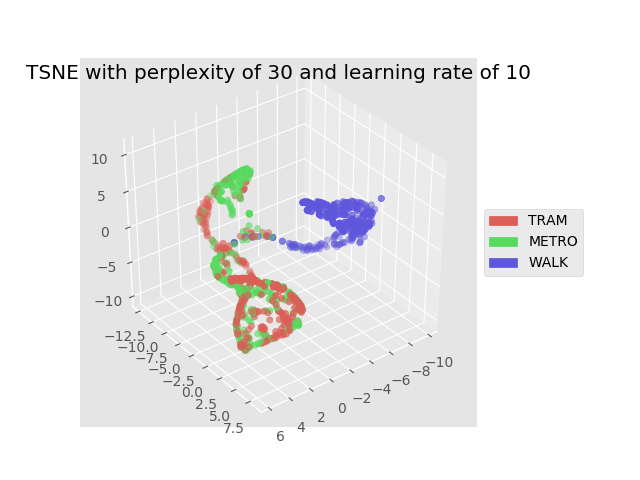

In [7]:
from sklearn.manifold import TSNE
trips_to_use = trips_reduced
learning_rate_i = 10
perplexity_i = 30
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#fig,ax = plt.subplots()
colors, color_patches = get_color_encoding(srcipted_trips["mode"])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          handles=color_patches)
tsne = TSNE(3,learning_rate=learning_rate_i, perplexity=perplexity_i).fit_transform(trips_to_use)
ax.set_title("TSNE with perplexity of {} and learning rate of {}".format(perplexity_i,learning_rate_i))
ax.scatter(tsne[:, 0], tsne[:, 1], tsne[:, 2], c=colors)
plt.show();

<IPython.core.display.Javascript object>


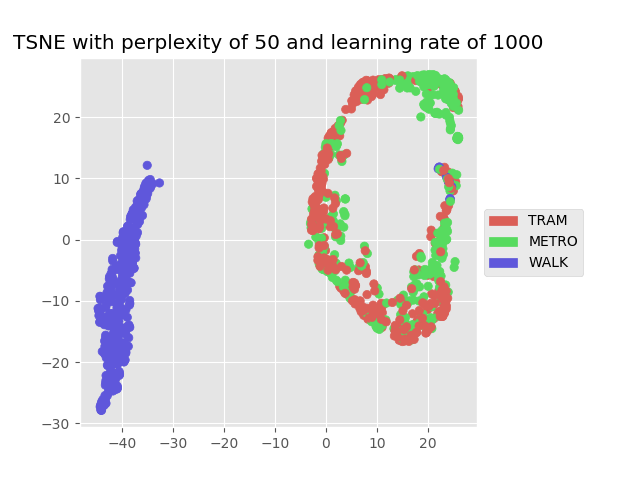

In [8]:
learning_rate_i = 1000
perplexity_i = 50
fig,ax = plt.subplots()
colors, color_patches = get_color_encoding(srcipted_trips["mode"])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          handles=color_patches)
tsne = TSNE(learning_rate=learning_rate_i, perplexity=perplexity_i).fit_transform(trips_to_use)
ax.set_title("TSNE with perplexity of {} and learning rate of {}".format(perplexity_i,learning_rate_i))
ax.scatter(tsne[:, 0], tsne[:, 1], c=colors)
plt.show();

### Visualising per token shows that there seems to be no structure for the individal recording devices. Which is expected due to resampling to same hertz rate

<IPython.core.display.Javascript object>


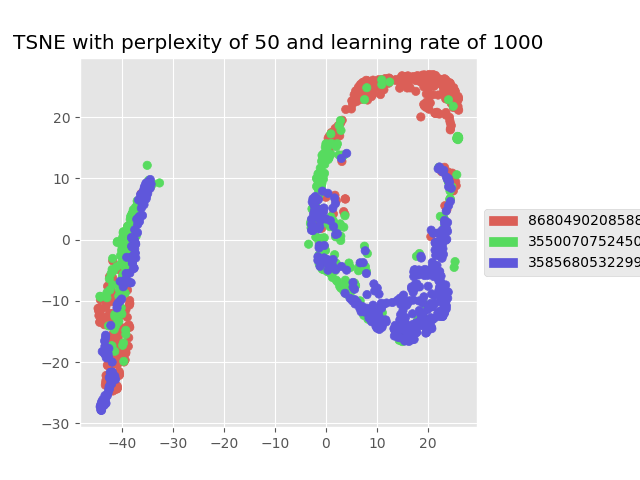

In [9]:
learning_rate_i = 1000
perplexity_i = 50
fig,ax = plt.subplots()
colors, color_patches = get_color_encoding(srcipted_trips["token"])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          handles=color_patches)
ax.set_title("TSNE with perplexity of {} and learning rate of {}".format(perplexity_i,learning_rate_i))
ax.scatter(tsne[:, 0], tsne[:, 1], c=colors)
plt.show();